In [2]:
import requests
import json
from ipywidgets import widgets, Layout
from IPython.display import display



def ask_wiki_bot(question):
    url = 'https://vqmeb2ndjf.us-east-1.awsapprunner.com/message'
    data = {'message': question}
    headers = {'Content-Type': 'application/json'}

    response = requests.post(url, data=json.dumps(data), headers=headers)

    if response.status_code == 200:
        return response.json()['response']
    else:
        return "Error: Could not communicate with the server."

def on_ask_button_click(button):
    response = ask_wiki_bot(question_input.value)
    response_output.clear_output()
    with response_output:
        print(response)

question_input = widgets.Text(
    description='Question:',
    layout=Layout(width='90%')
)

ask_button = widgets.Button(
    description='Ask Wiki Bot',
    button_style='info',
    layout=Layout(width='20%')
)

ask_button.on_click(on_ask_button_click)

response_output = widgets.Output()

display(question_input, ask_button, response_output)



Text(value='', description='Question:', layout=Layout(width='90%'))

Button(button_style='info', description='Ask Wiki Bot', layout=Layout(width='20%'), style=ButtonStyle())

Output()

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from ipywidgets import widgets, Layout
from IPython.display import display
import pandas as pd

def train_and_evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
    y_pred_proba_binarized = y_pred_proba
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_binarized[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    roc_auc_avg = np.mean(list(roc_auc.values()))
    accuracy = accuracy_score(y_test, y_pred)
    
    return fpr, tpr, roc_auc, roc_auc_avg, accuracy
def plot_roc_curves(fpr, tpr, roc_auc, model_name):
    plt.figure()
    for i, color in zip(range(3), ['blue', 'red', 'green']):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {model_name}')
    plt.legend(loc="lower right")
    plt.show()


def on_model_button_click(button):
    model = button.model
    fpr, tpr, roc_auc, roc_auc_avg, accuracy = train_and_evaluate_model(model)
    
    result_output.clear_output()
    with result_output:
        print(f"Model: {model.__class__.__name__}")
        print(f"AUC: {roc_auc_avg:.4f}")
        print(f"Accuracy: {accuracy:.4f}")
        plot_roc_curves(fpr, tpr, roc_auc, model.__class__.__name__)

# Create buttons for each model
models = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

buttons = [widgets.Button(description=model.__class__.__name__, layout=Layout(width='20%')) for model in models]

for button, model in zip(buttons, models):
    button.model = model
    button.on_click(on_model_button_click)

result_output = widgets.Output()

display(*buttons, result_output)


Button(description='LogisticRegression', layout=Layout(width='20%'), style=ButtonStyle())

Button(description='KNeighborsClassifier', layout=Layout(width='20%'), style=ButtonStyle())

Button(description='SVC', layout=Layout(width='20%'), style=ButtonStyle())

Button(description='DecisionTreeClassifier', layout=Layout(width='20%'), style=ButtonStyle())

Button(description='RandomForestClassifier', layout=Layout(width='20%'), style=ButtonStyle())

Output()

In [5]:
# add dropdown for grid search or random search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

dropdown = widgets.Dropdown(
    options=['Grid Search', 'Random Search'],
    value='Grid Search',
    description='Search Type:',
    disabled=False,
    layout=Layout(width='20%')
)

display(dropdown)

Dropdown(description='Search Type:', layout=Layout(width='20%'), options=('Grid Search', 'Random Search'), val…

In [6]:
# save the mode     
def on_save_button_click(button):
    pass

save_button = widgets.Button(
    description='Save Model',
    button_style='info',
    layout=Layout(width='20%')
)

save_button.on_click(on_save_button_click)

dropdown = widgets.Dropdown(
    options=['Random Forest', 'Logistic Regression', 'KNN', 'SVM', 'Decision Tree'],
    value='Random Forest',
    description='Model:',
    disabled=False,
    layout=Layout(width='20%')
)

display(dropdown, save_button)



Dropdown(description='Model:', layout=Layout(width='20%'), options=('Random Forest', 'Logistic Regression', 'K…

Button(button_style='info', description='Save Model', layout=Layout(width='20%'), style=ButtonStyle())

In [14]:
# import ipywidgets as widgets
# import matplotlib as mpl
# import pandas as pd
# import random
# import itertools
# from matplotlib import colors
# import matplotlib.pyplot as plt

# import ml_plotting_functions

# mpl.rcParams['figure.dpi'] = 150 # Increase size in Jupyter

In [15]:
##################################################
# The plotting functions for the three main views
##################################################

df = pd.DataFrame()


def plot_marbles_with_truth_color(class_imbalance, n_x=10, n_y=10):
    fig, ax = plt.subplots(ncols=1, figsize=(3, 3))

    # data prep
    df['coords'] = list(itertools.product(*[range(n_x), range(n_y)]))
    df['true_values'] = [int(random.random() + class_imbalance) for _ in range(n_x * n_y)]
    df['true_colors'] = df['true_values'].apply(lambda v: ml_plotting_functions.DEFAULT_MARBLE_COLOR  if v == 1 else 'white')

    # actual plotting
    ml_plotting_functions.draw_value_circles(ax, df['true_colors'], df['coords'])

    # finalize
    fig.suptitle("How the truth looks like")
    plt.show()
    plt.close(fig)


def plot_classifier_view(quality):
    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

    # data prep
    df['predicted_values'] = ml_plotting_functions.predict_values(df['true_values'], quality=quality)
    df['predicted_value_colors'] = df['predicted_values'].astype(str)
    df['face_colors'] = df['predicted_values'].apply(lambda c: tuple(list(colors.to_rgb(ml_plotting_functions.DEFAULT_MARBLE_COLOR)) + [c]))

    # actual plotting
    ml_plotting_functions.draw_value_circles(ax1, df['face_colors'], df['coords'])
    ml_plotting_functions.plot_predicted_values_as_swarmplot_with_color_gradient(ax2,
                                                           df.sort_values('predicted_values')['predicted_values'],  # since for the swarm plot, marker order is sorted by value
                                                           s=10)
    # finalize
    fig.suptitle("How the classifier sees it")
    plt.show()
    plt.close(fig)


def plot_evaluation_metrics(cutoff):
    fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

    # data prep
    df['predicted_binary_values'] = df['predicted_values'].apply(lambda x: 0 if x < cutoff else 1)
    df_sorted = df.sort_values('predicted_values')

    # actual plotting
    ml_plotting_functions.plot_predicted_values_as_swarmplot_with_green_red_outline(ax1,
                                                              df_sorted['true_values'],
                                                              df_sorted['predicted_values'],
                                                              df_sorted['predicted_binary_values'], cutoff)
    ml_plotting_functions.make_roc_curve_plot(ax2, df['true_values'], df['predicted_values'], cutoff)
    ml_plotting_functions.make_precision_recall_bar_chart(ax3, df['true_values'], df['predicted_binary_values'])

    # finalize
    fig.suptitle("Evaluation metrics with cutoff\n", va='bottom')
    plt.show()
    plt.close(fig)

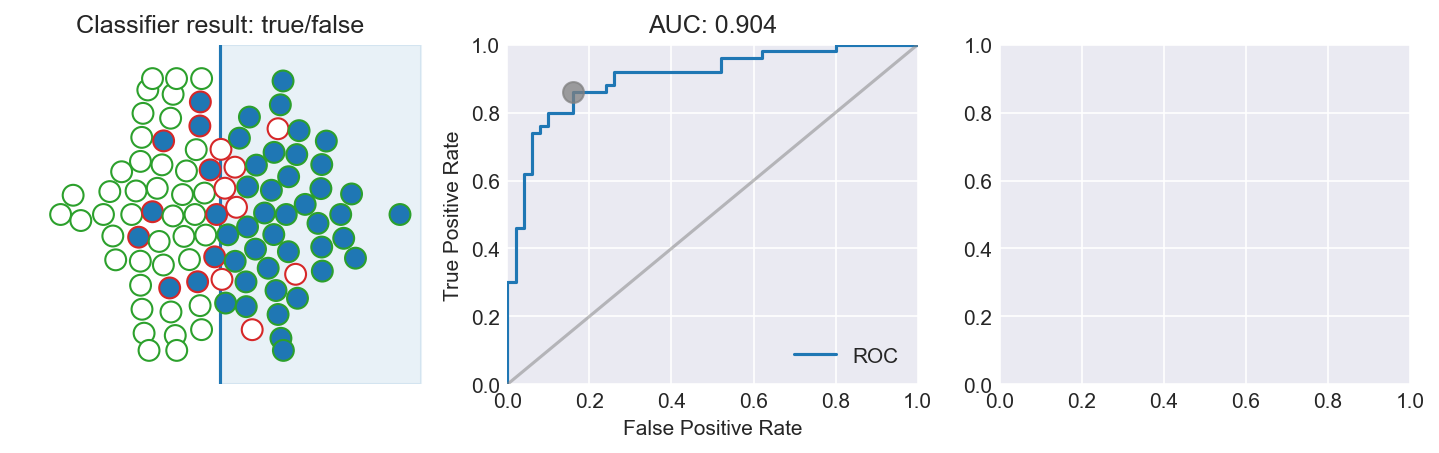

In [16]:
# ##################################################
# # Setup widgets, interactivity & layout
# ##################################################

# # Create the widgets
# class_imbalance_widget = widgets.FloatSlider(min=0.1,
#                                              max=0.9,
#                                              step=0.1,
#                                              value=0.5,
#                                              continuous_update=False,
#                                              description='Class imbalance',
#                                              style={'description_width': 'initial'})

# quality_widget = widgets.FloatSlider(min=0,
#                                      max=1,
#                                      step=0.1,
#                                      value=0.5,
#                                      continuous_update=False,
#                                      description='Classifier strength',
#                                      style={'description_width': 'initial'})

# cutoff_widget = widgets.FloatSlider(min=0,
#                                     max=1,
#                                     step=0.05,
#                                     value=0.5,
#                                     continuous_update=False,
#                                     description='Cutoff value',
#                                     style={'description_width': 'initial'})


# # Create the views
# truth_view = widgets.interactive(plot_marbles_with_truth_color,
#                                  class_imbalance=class_imbalance_widget,
#                                  n_x=widgets.fixed(10),
#                                  n_y=widgets.fixed(10))
# classifier_view = widgets.interactive(plot_classifier_view, quality=quality_widget)
# metrics_view = widgets.interactive(plot_evaluation_metrics, cutoff=cutoff_widget)

# # In case of value change, update downstream views
# class_imbalance_widget.observe(lambda x: classifier_view.update(), 'value')
# class_imbalance_widget.observe(lambda x: metrics_view.update(), 'value')
# quality_widget.observe(lambda x: metrics_view.update(), 'value')

# # Put the views into a layout grid
# grid = widgets.GridspecLayout(2, 3, layout=widgets.Layout(justify_content='center'))
# grid[0, 0] = truth_view
# grid[0, 1:] = classifier_view
# grid[1, :] = metrics_view

In [17]:
# ##################################################
# # Make the app
# ##################################################

# title_html = """
# <h2>Machine Learning Model Evaluation: Visual & Interactive</h2>

# <ul style="line-height: 1.5">
#   <li>A classifier was trained to identify positive targets, here visualized as blue marbles (upper left).
# The ratio of negative (white) and positive (blue) targets can be controlled via the slider.</li>

#   <li>The strength-adjustable classifier then predicts a score from one to zero for each item (upper center and right).</li>
  
#   <li>Based on this score and an adjustable cutoff threshold, each item is classified as either positive or negative.
# Correct or incorrect classification is highlighted with a green or red outline for each circle (lower left). 
# Subsequently, 
# <a href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic"> the ROC curve and the AUC value<a>
# (lower center) as well as
# <a href="https://en.wikipedia.org/wiki/Precision_and_recall"> precision, recall</a> 
# and 
# <a href="https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification"> accuracy </a> 
# (lower right) can be calculated.</li>
# </ul>
# """

# description_html = """
# <style>
# p {
#     margin-bottom: 1.2em;
#     line-height: 1.5;
# }
# </style>

# <p>The effects of different configurations regarding class imbalance, model strength or cutoff threshold on evaluation metrics can be studied.
# Also, the relationship between these metrics, e.g. the tradeoff between precision and recall, can be observed.</p>

# <p>This allows e.g. to explore the problem with accuracy for unbalanced classes: In the case of few positive targets, 
# a weak classifier with a high threshold will yield a high accuracy simply due to labelling everything negative.</p>

# <p>Source code <a href="https://github.com/dhaitz/machine-learning-interactive-visualization"> here</a>. Ideas, suggestions and improvements welcome! /<a href="https://dhaitz.github.io">dh</a></p>
# """
# app_contents = [widgets.HTML(title_html, layout=widgets.Layout(margin='0 0 3em 0', max_width='800px')),
#             grid,
#             widgets.HTML(description_html, layout=widgets.Layout(margin='3em 0 0 0', max_width='800px'))]
# app = widgets.VBox(app_contents, layout=widgets.Layout(max_width='1024px', margin='0 auto 0 auto'))
# display(app)